# Instalação de bibliotecas e tratamento de dados

Instalando as bibliotecas necessárias por meio do ```pip```:

In [53]:
pip install matplotlib pandas numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Realizando a importação das bibliotecas necessárias:

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Criando um dataframe do pandas utilizando o arquivo ```.csv```:

In [4]:
df = pd.read_table('colunas_extraidas.csv')
print(df.head())

   duration  avePktSize  stdPktSize    aveIAT  tcpPSeqCnt  tcpAveWinSz  \
0  0.107556    70.07692   149.21210  0.008274          10     31273.69   
1  0.095254   413.92860   544.76010  0.006804          14    146662.30   
2  0.147447   658.00000    62.21429  0.038218  3443214620     64240.00   
3  0.113265  1460.00000   439.83330  0.038556   814700454     64240.00   
4  0.244908   670.00000    66.69231  0.051794  1866743570     64240.00   

   tcpRTTAckTripAve  
0          0.010127  
1          0.002108  
2          0.036305  
3          0.003597  
4          0.051760  


Selecionando as colunas e adquirindo as médias para exibição:

In [56]:
# 6	U64.U32	duration	Flow duration
tempo_medio_duracao = df['duration'].mean()
# 35	F	avePktSize	Average layer 3 packet size
tamanho_medio_pacotes = df['avePktSize'].mean()
# 36	F	stdPktSize	Standard deviation layer 3 packet size
desvio_padrao_pacotes = df['stdPktSize'].mean()
# 39	F	aveIAT	Average IAT
iat_medio = df['aveIAT'].mean()
# 92	F	tcpRTTAckTripAve	TCP ACK trip average
rtt_medio = df['tcpRTTAckTripAve'].mean()

print(f"Tempo médio de duração de um fluxo: {tempo_medio_duracao:.2f} segundos")
print(f"Tamanho médio dos pacotes de camada 3: {tamanho_medio_pacotes:.2f} bytes")
print(f"Desvio padrão do tamanho dos pacotes: {desvio_padrao_pacotes:.2f} bytes")
print(f"Inter-Arrival Time (IAT) médio: {iat_medio:.2f} segundos")
print(f"Média de RTT da flag ACK no TCP: {rtt_medio:.2f} segundos")

Tempo médio de duração de um fluxo: 20.29 segundos
Tamanho médio dos pacotes de camada 3: 322.28 bytes
Desvio padrão do tamanho dos pacotes: 213.70 bytes
Inter-Arrival Time (IAT) médio: 4.94 segundos
Média de RTT da flag ACK no TCP: 2.25 segundos


# Gráficos

Gráfico de barras para o tempo médio de duração dos fluxos

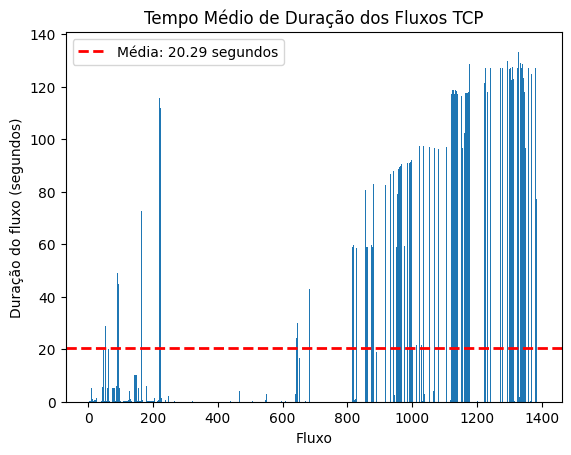

In [64]:
plt.bar(df.index, df['duration'])
plt.title('Tempo Médio de Duração dos Fluxos TCP')
plt.xlabel('Fluxo')
plt.ylabel('Duração do fluxo (segundos)')
avg = df['duration'].mean()
plt.axhline(y=avg, color='red', linestyle='--', linewidth=2, label=f'Média: {avg:.2f} segundos')
plt.legend()
plt.show()

Histograma para o tamanho dos pacotes de camada 3

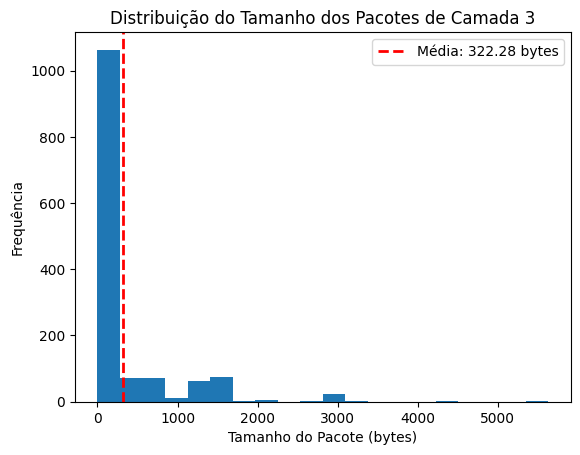

In [44]:
plt.hist(df['avePktSize'], bins=20)
plt.title('Distribuição do Tamanho dos Pacotes de Camada 3')
plt.xlabel('Tamanho do Pacote (bytes)')
plt.ylabel('Frequência')
avg = df['avePktSize'].mean()
plt.axvline(x=avg, color='red', linestyle='--', linewidth=2, label=f'Média: {avg:.2f} bytes')
plt.legend()
plt.show()

Tabela:

In [25]:
""" bins = [0, 200, 400, 600, 800, 1000]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000'] """

bins = [0, 1000, 2000, 3000, 4000, 10000]
labels = ['< 1000', '1000-2000', '2000-3000', '3000-4000', '> 4000']

size_frequency_table = pd.cut(df['avePktSize'], bins=bins, labels=labels, right=False).value_counts().sort_index()

size_frequency_table = size_frequency_table.reset_index()
size_frequency_table.columns = ['Tamanho do pacote de camada 3', 'Frequência']

size_frequency_table.head()

,Tamanho do pacote de camada 3,Frequência
0,< 1000,1213
1,1000-2000,145
2,2000-3000,30
3,3000-4000,3
4,> 4000,2


Gráfico de linha para representar o IAT médio entre pacotes

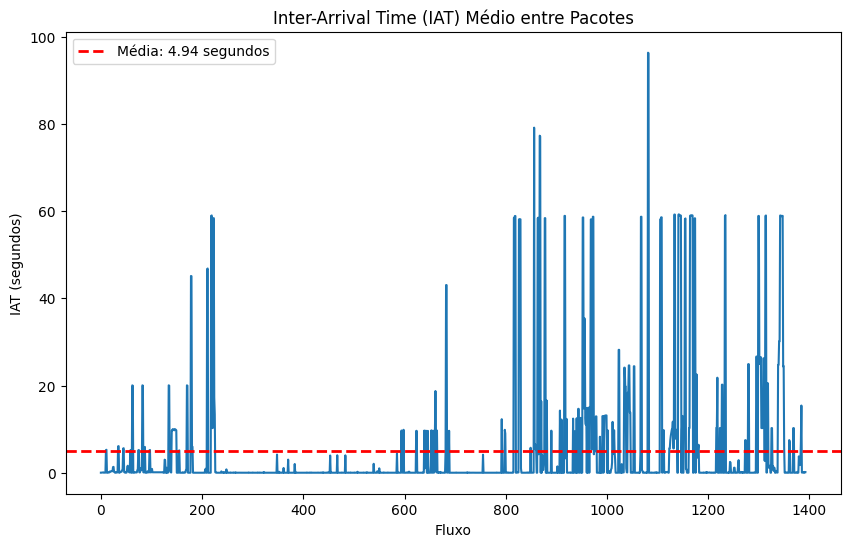

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['aveIAT'])
plt.title('Inter-Arrival Time (IAT) Médio entre Pacotes')
plt.xlabel('Fluxo')
plt.ylabel('IAT (segundos)')
avg = df['aveIAT'].mean()
plt.axhline(y=avg, color='red', linestyle='--', linewidth=2, label=f'Média: {avg:.2f} segundos')
plt.legend()
plt.show()

Domínios mais visitados via campo dstIP

In [51]:
df = pd.read_table('colunas.csv')
df_ip_count = df['dstIP'].value_counts().reset_index()
df_ip_count.columns = ['dstIP', 'count']
df_ip_count.head()

,dstIP,count
0,10.49.10.60,480
1,10.54.0.155,352
2,224.0.0.22,72
3,04,68
4,10,44


Portas mais acessadas via campo "srcPort"

In [59]:
df = pd.read_table('colunas.csv')
df_ip_count = df['srcPort'].value_counts().reset_index()
df_ip_count.columns = ['Porta', 'Solicitações']
df_ip_count.head()

,Porta,Solicitações
0,53,352
1,443,119
2,0,74
3,10.49.10.60,68
4,"addresses""",32
